In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np
import math

# To handle data in form of rows and columns 
import pandas as pd 

# To split data into train and test
from sklearn.model_selection import train_test_split

# Import machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Import RFE for feature selection
from sklearn.feature_selection import RFE

# Import Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Import ploting libraries
import matplotlib.pyplot as plt   

# Import seaborn for statistical plots
import seaborn as sns

# Import statsmodels for ols model
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt

# Import zscore for standard score
from scipy.stats import zscore

# To evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Import warnings to hide them
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv('dataset.csv')

# Check top 5 records to get a feel of the data structure
df.head()

0         1           2           3         4          5  \
0  7.547600  0.151261  557.132466  354.008599  0.301029  55.282594   
1  3.140491  0.794497  837.116189  104.515774  0.110622  88.516243   
2  2.064447  0.236500  313.757354  259.127993  0.729964  88.350465   
3  9.099262  0.453953  661.409826  466.070226  0.432750  21.516152   
4  5.264564  0.683869  344.154511  485.441053  0.085599  90.308205   

             6    7    8        target  
0  9635.211683  2.0  1.0   9461.469590  
1  9425.041942  2.0  5.0  10257.271938  
2  9115.661199  1.0  5.0   8719.214483  
3  9584.310016  3.0  2.0   9165.197338  
4  9193.271575  2.0  1.0   9458.427537

In [3]:
print('Number of rows : ',df.shape[0])
print('Number of columns : ',df.shape[1])

Number of rows :  900
Number of columns :  10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       900 non-null    float64
 1   1       900 non-null    float64
 2   2       900 non-null    float64
 3   3       900 non-null    float64
 4   4       900 non-null    float64
 5   5       900 non-null    float64
 6   6       900 non-null    float64
 7   7       900 non-null    float64
 8   8       900 non-null    float64
 9   target  900 non-null    float64
dtypes: float64(10)
memory usage: 70.4 KB


In [5]:
df.describe().T

count         mean         std          min          25%          50%  \
0       900.0     5.036548    2.869018     0.037452     2.518373     4.944200   
1       900.0     0.504976    0.289803     0.000942     0.248575     0.524393   
2       900.0   493.064463  290.436017     0.969406   247.145068   497.186526   
3       900.0   297.303826  116.899846   100.651192   195.239150   301.949065   
4       900.0     0.507925    0.286008     0.000527     0.284926     0.501211   
5       900.0    49.781970   28.684840     0.185411    25.777689    49.517510   
6       900.0  9507.426024  283.069448  9000.096807  9267.721916  9500.814515   
7       900.0     1.973333    0.788798     1.000000     1.000000     2.000000   
8       900.0     3.436667    1.677367     1.000000     2.000000     3.000000   
target  900.0  9118.263873  852.633238  6298.862662  8627.098283  9208.588416   

                75%           max  
0          7.631981      9.997094  
1          0.753136      0.998795  
2        736.572313    999.208515  
3        399.999965    499.174221  
4          0.750584      0.999742  
5         74.538269     99.926403  
6       9751.394987   9999.499080  
7          3.000000      3.000000  
8          5.000000      6.000000  
target  9713.801784  11175.834533

In [6]:
# Check for null values
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
target    0
dtype: int64

### Let us do a pair plot analysis to visually check number of likely clusters

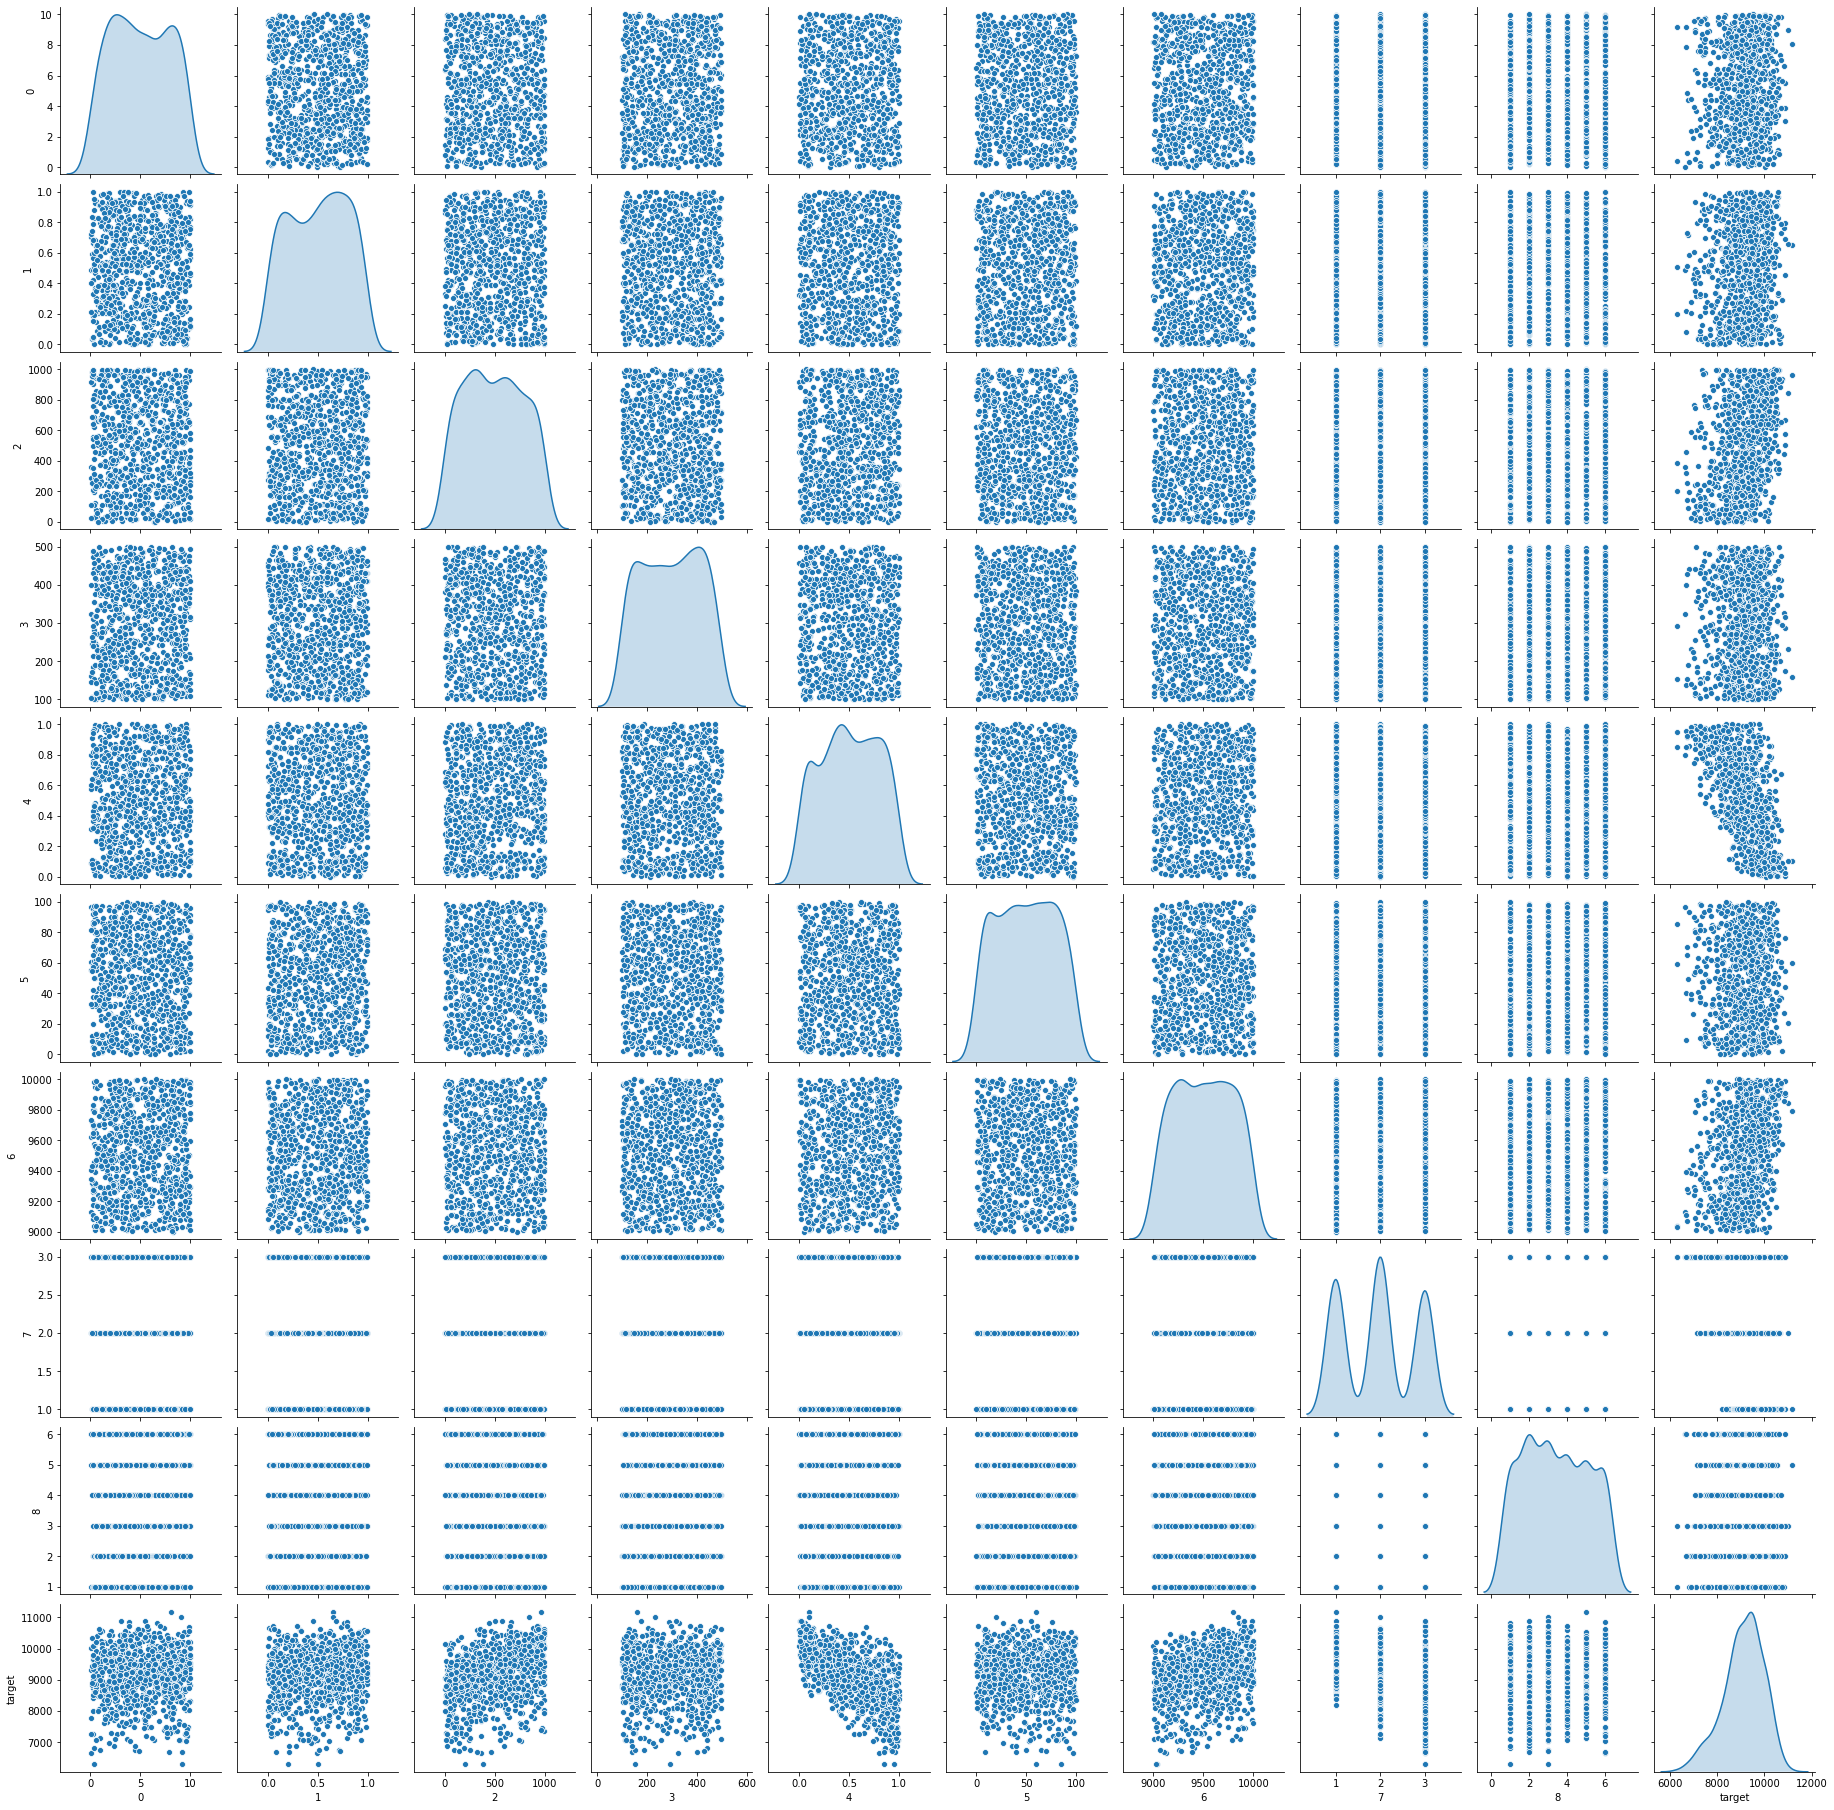

Wall time: 34.2 s


In [7]:
%%time
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram
plt.show()

#sns.pairplot(df)  # to plot histogram, the default

In [8]:
# Applying zscore
df_attr = df.iloc[:,:-1]
df_tar = df['target']
df_attr_z = df_attr.apply(zscore)

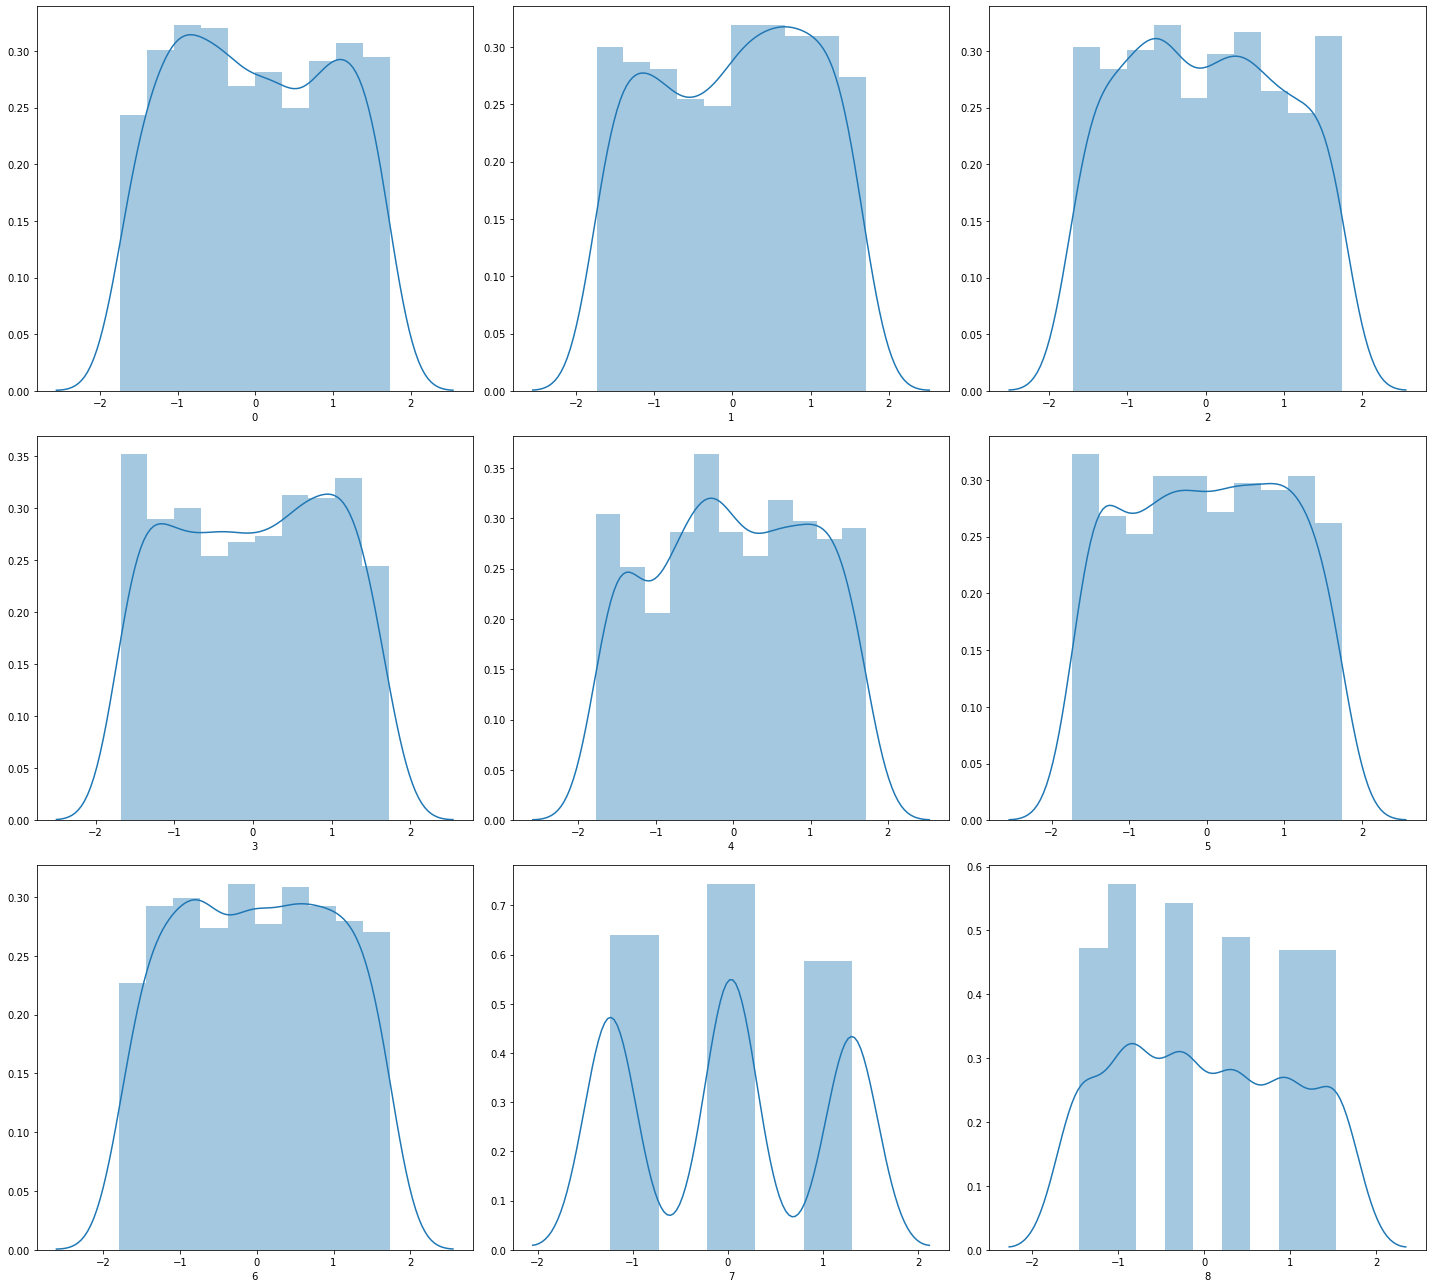

In [9]:
# pick number of columns
ncol = 3
# make sure enough subplots
nrow = math.floor((len(df_attr_z.columns) + ncol - 1) / ncol)
# create the axes
height = 6 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(df_attr_z.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.distplot(df_attr_z[col], ax=ax[ix])

plt.tight_layout()
plt.show();

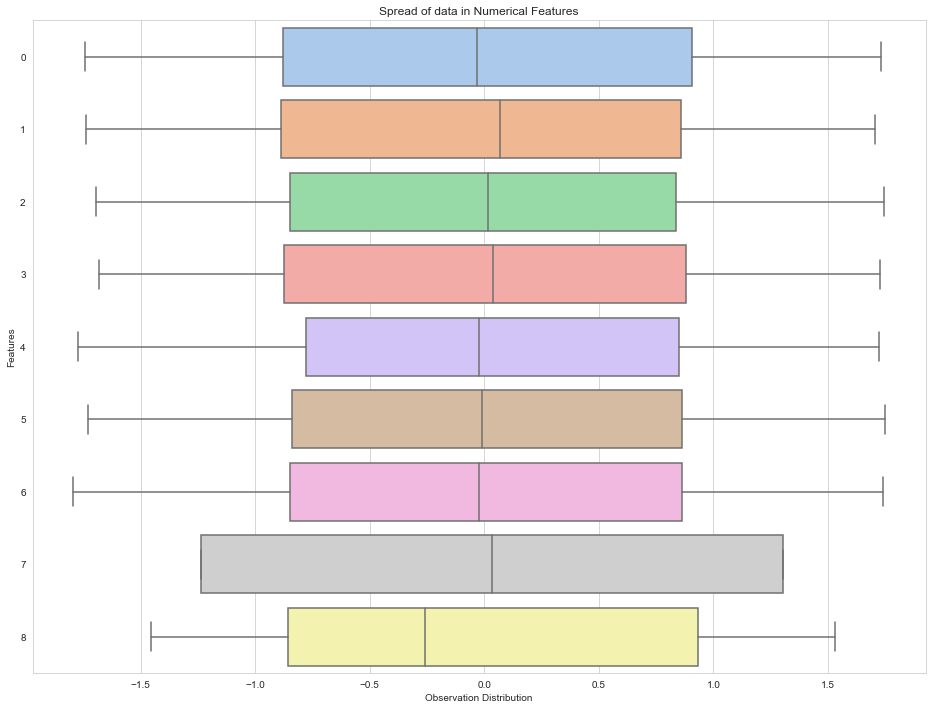

In [10]:
# Box and whiskers plot
# Spread of numerical features

sns.set_style("whitegrid")
plt.subplots(figsize=(16, 12))

# Using seaborn to plot it horizontally
sns.boxplot(data=df_attr_z, orient='h', palette='pastel')

plt.title('Spread of data in Numerical Features')
plt.xlabel('Observation Distribution')
plt.ylabel('Features')
plt.show();

In [11]:
X = df_attr_z # select all rows and columns which are the attributes
y = df_tar  # select all rows and column which is the target

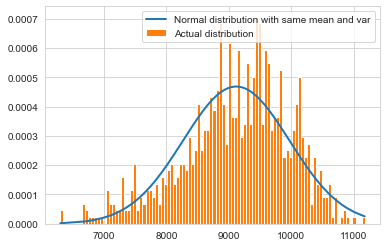

In [12]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(y)
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [13]:
round(y.skew(), 4)

-0.5319

* target is not normally distributed
* It is left skewed
* we can rectify it by tranformation:
    * log
    * sqrt
    * inverse
    * exponential

### OLS

In [14]:
x_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     480.1
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:20:04   Log-Likelihood:                -6554.8
No. Observations:                 900   AIC:                         1.313e+04
Df Residuals:                     890   BIC:                         1.318e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9118.2639     11.805    772.403      0.000    9095.095    9141.433
0             42.0124     11.839      3.549      0.000      18.776      65.249
1             65.1669     11.850      5.500      0.000      41.911      88.423
2            300.3992     11.846     25.360      0.000     277.151     323.648
3              2.0611     11.828      0.174      0.862     -21.153      25.275
4           -557.9603     11.889    -46.930      0.000    -581.295    -534.626
5             23.8226     11.916      1.999      0.046       0.436      47.209
6            281.5720     11.904     23.654      0.000     258.209     304.935
7           -412.4362     11.906    -34.640      0.000    -435.804    -389.069
8             -5.0040     11.857     -0.422      0.673     -28.275      18.267
==============================================================================
Omnibus:                       12.115   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.059
Skew:                          -0.080   Prob(JB):                       0.0178
Kurtosis:                       2.565   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions

#### Autocorelation_test

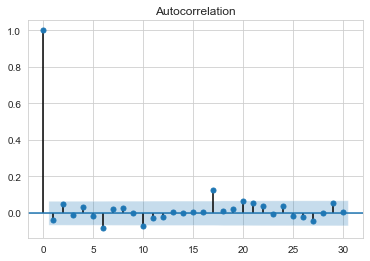

In [15]:
acf = smt.graphics.plot_acf(lin_reg.resid) #lags takes 40 residuals 
acf.show()

* ALTERNATING graph, NEGATIVE CORELATION but Durbin-Watson : 2.073(from OLS summary)
* **That's good, here No/less autocorelation**

#### Normality_test

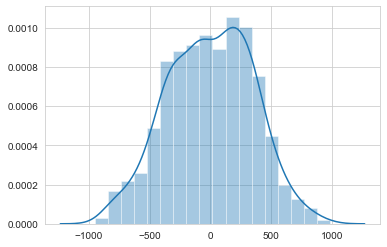

jb_value:  8.0594
p_value :  0.0178


In [16]:
#jarque - bera test
import scipy.stats as stats
jb_value, p_value = stats.jarque_bera(lin_reg.resid) #jarque - bera test

sns.distplot(lin_reg.resid)
plt.show()

print('jb_value: ',round(jb_value, 4))
print('p_value : ',round(p_value, 4))

* NULL : ERROR terms(residuals) are normally distributed
* ALTERNATE : ERROR terms(residuals) are **not** normally distributed
* value  <  0.05(level of significance) ~ **5.99**(chisquare value) ==> failed to reject NULL
* value  >  0.05(level of significance) ~ **5.99**(chisquare value) ==> reject NULL


* **Normality exists**

#### Linearity_test

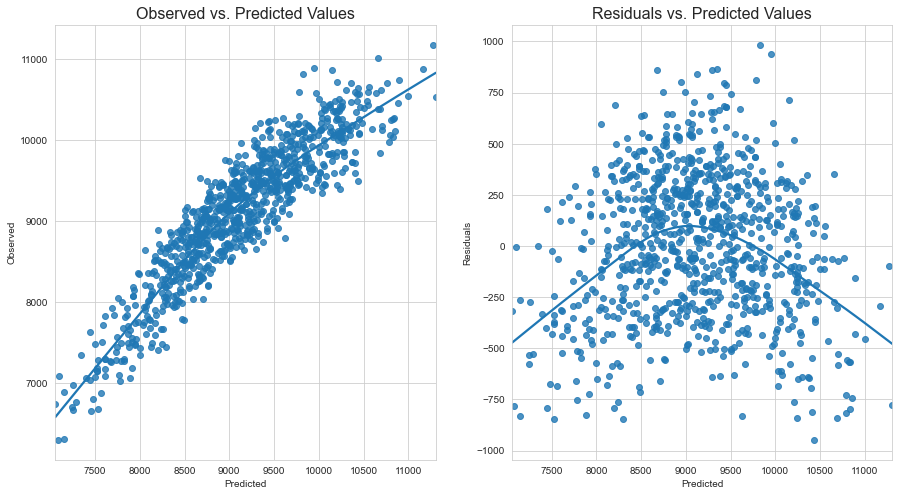

In [17]:
#regplot

y_predict = lin_reg.predict()
y_residual = lin_reg.resid

fig, axis = plt.subplots(1,2, figsize = (15,8))

sns.regplot(y_predict, y, lowess = True, ax = axis[0])
axis[0].set_title('Observed vs. Predicted Values', fontsize=16)
axis[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(y_predict, y_residual, lowess = True, ax = axis[1])#lowess shows not perfectly linear
axis[1].set_title('Residuals vs. Predicted Values', fontsize=16)
axis[1].set(xlabel='Predicted', ylabel='Residuals')

plt.show()

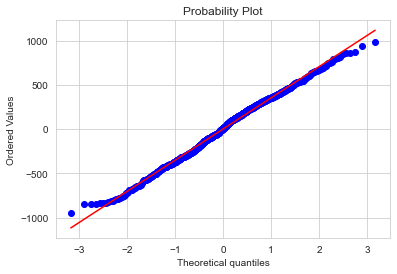

In [18]:
#probplot

stats.probplot(lin_reg.resid, plot = plt)
plt.show()

In [19]:
# MEAN
print('VERY MUCH CLOSE TO ZERO: ',lin_reg.resid.mean()) #mean of residuals is 0 implies residuals are linear

VERY MUCH CLOSE TO ZERO:  -1.7037867413212855e-12


In [20]:
#rainbow test

f_stat, p_value = sm.stats.diagnostic.linear_rainbow(res=lin_reg)
print('f_stat : ',f_stat)
print('p_value:  {} > 0.05'.format(p_value))
print('failed to reject NULL')

f_stat :  0.9930566547342303
p_value:  0.5294154940606748 > 0.05
failed to reject NULL


**So, linearity is present in residuals**

#### Homoscedasticity_test

Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:
$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$

The residuals should be homoscedastic.

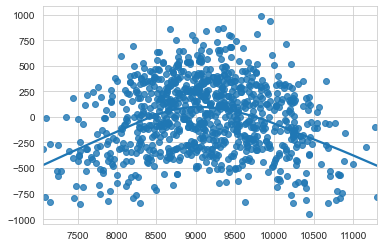

(0.8881300997475882, 0.8931038183016936, 'increasing')

P_value: 0.8931038183016936 is greater then 0.05, failed to reject Null


In [21]:
sns.regplot(x = lin_reg.predict(), lowess = True, y = lin_reg.resid)
plt.show()

#goldfeld test
print(sms.het_goldfeldquandt(lin_reg.resid, lin_reg.model.exog))
print('\nP_value: 0.8931038183016936 is greater then 0.05, failed to reject Null')

* **HOMOSEDASTIC**

#### Multicolinearity_test

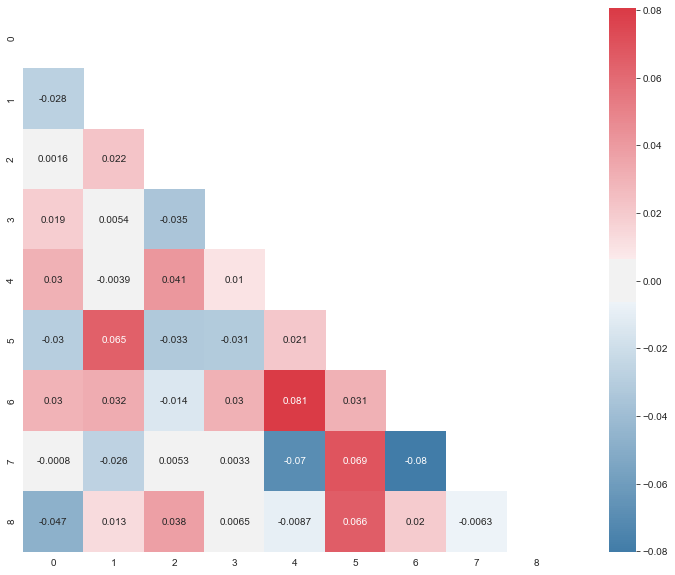

In [22]:
# Set the style of the visualization
sns.set_style('white')

# Create a Correlation matrix
corr = df_attr_z.corr()

# Generate a mask the size of our Correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = None

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

# Draw the heatmapwith the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, square=True, annot=True)

plt.show();

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(x_constant.values, 1)
#index 0 has constant value which is useless to calculate its VIF

1.0058353655799783

In [24]:
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
data = pd.DataFrame({'columns': X.columns, 'VIF': vif[1:]})
data

columns       VIF
0       0  1.005835
1       1  1.007547
2       2  1.006882
3       3  1.003858
4       4  1.014317
5       5  1.018891
6       6  1.016784
7       7  1.017222
8       8  1.008834

* **VIF of columns are less than 5, so Multicollinearity does not exists**

### LINEAR MODEL BUILT ON WHOLE DATA

In [25]:
# Linear Regression on Wole data
lr = LinearRegression()
lr.fit(X , y)
 
print('r2_score for whole data: ',round(lr.score(X, y), 4))

r2_score for whole data:  0.8292


In [26]:
### Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

#### Are both train and test good representative of the overall data

In [27]:
#label test and train data
X_train['label']=1
X_test['label']=0

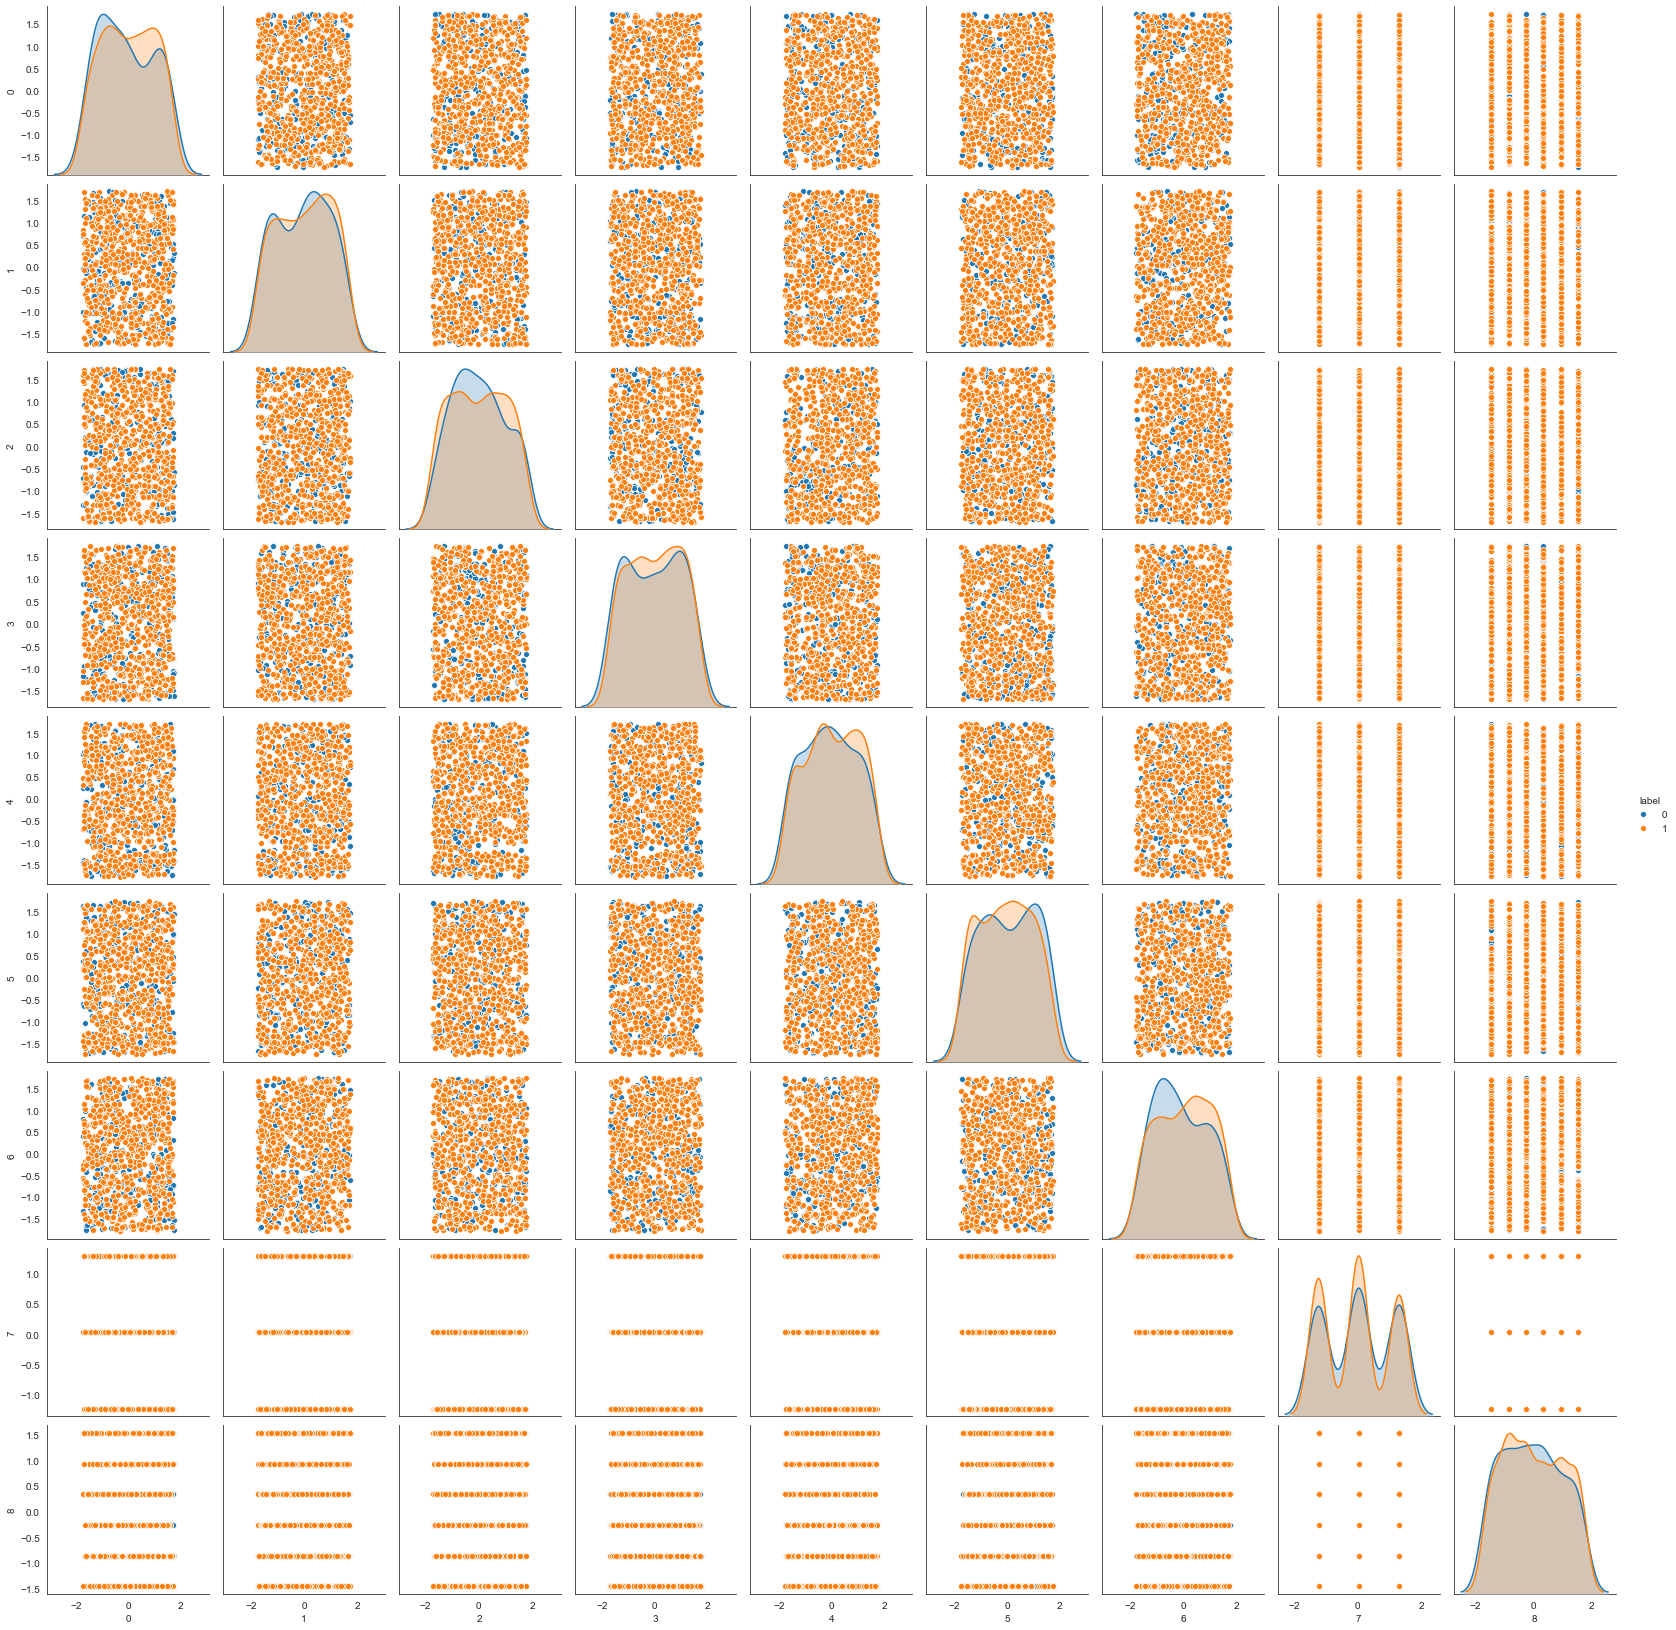

Wall time: 39 s


In [28]:
%%time
A=pd.concat([X_test,X_train])
sns.pairplot(A,hue='label')
plt.show()

* Almost all the variables are overlapping. 
* Blue is test data and orange is train data. 
* Distributions are similar hence we can confirm that our data is splitted quite randomly hence giving rise to no anomaly and bias.

In [29]:
X_train.drop(['label'], axis = 1, inplace = True)
X_test.drop(['label'], axis = 1, inplace = True)

### LINEAR MODEL BUILT ON TRAIN TEST SPLIT DATA

#### Linear Regression

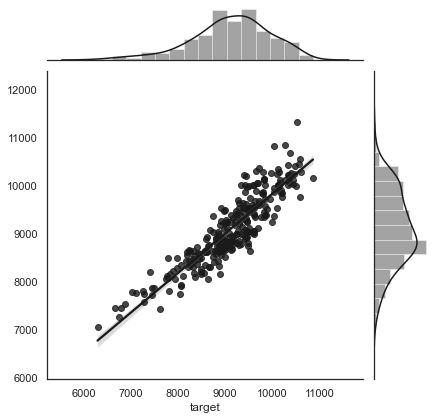

In [30]:
lr = LinearRegression()
lr.fit(X_train , y_train)

y_pred_lr = lr.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_lr, kind="reg", color="k")

In [31]:
# Training R2 score
print('r2_score for train data        : ',round(lr.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(lr.score(X_test, y_test), 4)) 

# Cross validation score
scoresdt = cross_val_score(lr, X_train, y_train, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.8353
r2_score for test data         :  0.8125
Cross validation score         :  0.8205
Bias Errors (1-Accuracy/R2)    :  0.1795
Variance Errors                :  0.0013
MAE (mean_absolute_error)      :  292.9151
MSE (mean_squared_error)       :  127975.0737
RMSE (root_mean_squared_error) :  357.736


#### Random forest

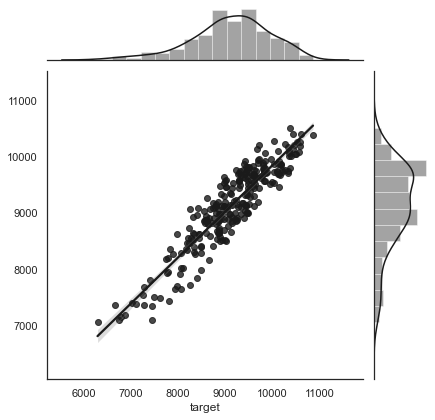

In [32]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_rf, kind="reg", color="k")

In [33]:
# Training R2 score
print('r2_score for train data        : ',round(rf.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(rf.score(X_test, y_test), 4)) 

# Cross validation score
scoresdt = cross_val_score(rf, X_train, y_train, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.9796
r2_score for test data         :  0.8478
Cross validation score         :  0.8387
Bias Errors (1-Accuracy/R2)    :  0.1613
Variance Errors                :  0.0011
MAE (mean_absolute_error)      :  273.4555
MSE (mean_squared_error)       :  103883.584
RMSE (root_mean_squared_error) :  322.3098


#### Gradient boosting

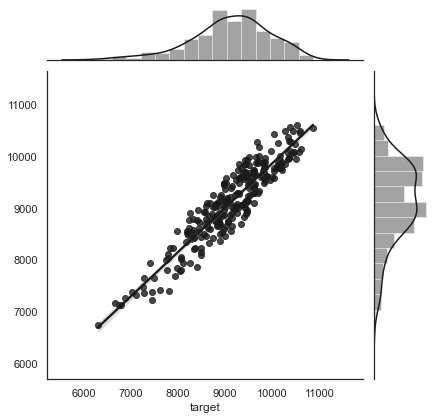

In [34]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_gb, kind="reg", color="k")

In [35]:
# Training R2 score
print('r2_score for train data        : ',round(gb.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(gb.score(X_test, y_test), 4)) 

# Cross validation score
scoresdt = cross_val_score(gb, X_train, y_train, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_gb)
MSE = mean_squared_error(y_test, y_pred_gb)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.9539
r2_score for test data         :  0.8661
Cross validation score         :  0.8574
Bias Errors (1-Accuracy/R2)    :  0.1426
Variance Errors                :  0.0008
MAE (mean_absolute_error)      :  259.473
MSE (mean_squared_error)       :  91382.6074
RMSE (root_mean_squared_error) :  302.2956


#### AdaBoost

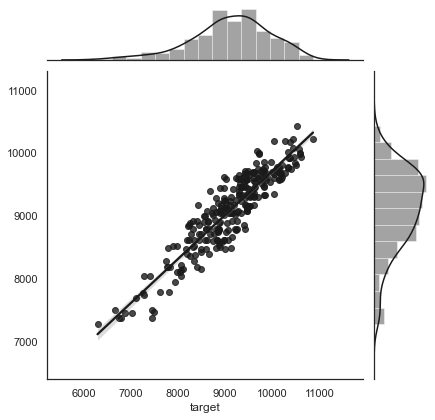

In [36]:
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_ab, kind="reg", color="k")

In [37]:
# Training R2 score
print('r2_score for train data        : ',round(ab.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(ab.score(X_test, y_test), 4)) 

# Cross validation score
scoresdt = cross_val_score(ab, X_train, y_train, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_ab)
MSE = mean_squared_error(y_test, y_pred_ab)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.8564
r2_score for test data         :  0.8222
Cross validation score         :  0.8046
Bias Errors (1-Accuracy/R2)    :  0.1954
Variance Errors                :  0.0009
MAE (mean_absolute_error)      :  287.347
MSE (mean_squared_error)       :  121404.7882
RMSE (root_mean_squared_error) :  348.4319


#### Ridge

In [38]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

rr001 = Ridge(alpha=0.001) #  comparison with alpha value
rr001.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score001 = rr001.score(X_train,y_train)
Ridge_test_score001 = rr001.score(X_test, y_test)

In [40]:
print("ridge regression train score alpha = 0.01  :", Ridge_train_score)
print("ridge regression test score alpha  = 0.01  :", Ridge_test_score)
print("ridge regression train score alpha = 0.001 :", Ridge_train_score001)
print("ridge regression test score alpha  = 0.001 :", Ridge_test_score001)

ridge regression train score alpha = 0.01  : 0.8353014612998767
ridge regression test score alpha  = 0.01  : 0.8125479933210955
ridge regression train score alpha = 0.001 : 0.8353014615384723
ridge regression test score alpha  = 0.001 : 0.812547616159426


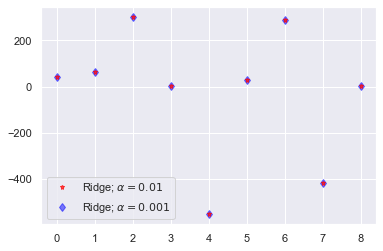

In [41]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
# zorder for ordering the markers
plt.plot(rr001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 0.001$')
# alpha here is for transparency
plt.legend()

#### Lasso

In [42]:
lasso = Lasso()
lasso.fit(X_train,y_train)

train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print(lasso)

print('\n',lasso.coef_)

print("\ntraining score:", train_score )
print("test score: ", test_score)
print("\nnumber of features used: ", coeff_used)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

 [  42.16713372   60.50022687  301.91233055    1.71751411 -553.49715974
   25.52791093  286.23652444 -416.68317356    3.43450627]

training score: 0.8352891022720627
test score:  0.8127380351735384

number of features used:  9


In [43]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print(lasso001)

print('\n',lasso001.coef_)

print("\ntraining score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("\nnumber of features used: for alpha =0.01:", coeff_used001)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

 [  43.2701626    61.35560033  302.96340613    2.74638519 -554.68658412
   26.59539078  287.03507143 -417.80344984    4.33288721]

training score for alpha=0.01: 0.8353014603045585
test score for alpha =0.01:  0.8125496142661189

number of features used: for alpha =0.01: 9


In [44]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print(lasso00001)

print('\n',lasso00001.coef_)

print("\ntraining score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("\nnumber of features used: for alpha =0.0001:", coeff_used00001)



Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

 [  43.28118795   61.36411766  302.97393129    2.75669235 -554.6984853
   26.60608618  287.04304948 -417.81465712    4.34186871]

training score for alpha=0.0001: 0.8353014615407586
test score for alpha =0.0001:  0.8125475947186487

number of features used: for alpha =0.0001: 9


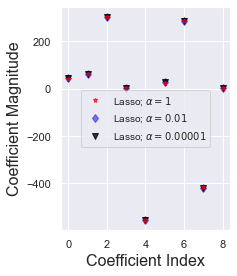

In [45]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=10,loc=10)
plt.tight_layout()
plt.show()

#### Elastic Net regression

In [46]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [47]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.24691897
Optimal l1_ratio: 1.000
Number of iterations 5


In [48]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=0.246918967406562, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=5, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [49]:
print(r2_score(y_train, model.predict(X_train))) # training data performance
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.8348905449563978
0.8132205633984912


### Feature selection

#### Backward elimination

In [50]:
x_constant = sm.add_constant(X)
model = sm.OLS(y,x_constant).fit()
p = model.pvalues
p

const     0.000000e+00
0         4.076792e-04
1         4.977094e-08
2        3.266400e-107
3         8.617022e-01
4        6.274576e-243
5         4.588983e-02
6         2.329251e-96
7        3.679931e-167
8         6.731083e-01
dtype: float64

In [51]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('Final set of variables are: ',selected_features_BE)

Final set of variables are:  ['0', '1', '2', '4', '5', '6', '7']


#### Recursive Feature Elimination

It is upto us, we can take any number of features for our model building.
To check what is the optimum number of features required

In [52]:
max_score = 0
n = 0
score_list = []
for i in range(1,len(X.columns)):
    model = LinearRegression()
    rfe = RFE(model, i)
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>max_score):
        max_score = score
        n = i
print('Optimum no of features: ',n)
print('Score with %d features:  %f '% (n,max_score))

Optimum no of features:  7
Score with 7 features:  0.832786 


In [53]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
x_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(x_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['0', '1', '2', '4', '5', '6', '7'], dtype='object')


**Taking significant features**

In [54]:
X = df_attr_z[['0', '1', '2', '4', '5', '6', '7']]
y = df_tar

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

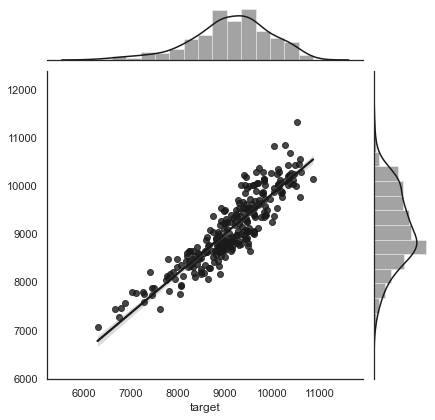

In [56]:
lr1 = LinearRegression()
lr1.fit(X_train , y_train)

y_pred_lr1 = lr1.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_lr1, kind="reg", color="k")

In [57]:
# Training R2 score
print('r2_score for train data        : ',round(lr1.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(lr1.score(X_test, y_test), 4)) 

# Cross validation score
scoresdt = cross_val_score(lr1, X_train, y_train, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_lr1)
MSE = mean_squared_error(y_test, y_pred_lr1)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.8353
r2_score for test data         :  0.8129
Cross validation score         :  0.8219
Bias Errors (1-Accuracy/R2)    :  0.1781
Variance Errors                :  0.0012
MAE (mean_absolute_error)      :  292.5748
MSE (mean_squared_error)       :  127718.9029
RMSE (root_mean_squared_error) :  357.3778


## Reading the prediction file into pandas dataframe

In [58]:
pred = pd.read_csv('prediction.csv')

# Check top 5 records to get a feel of the data structure
pred.head()

0         1           2           3         4          5  \
0  8.243945  0.442707  814.191463  437.449497  0.820757  66.358208   
1  0.450469  0.734878  690.536337  337.971868  0.163483  88.966042   
2  5.805761  0.412531  225.544432  468.295427  0.254678  27.853712   
3  4.126340  0.685302   73.330815  169.578437  0.828849  81.691968   
4  8.082666  0.449977  526.274384  308.148895  0.737136  30.420377   

             6    7    8  
0  9321.584760  1.0  5.0  
1  9653.465215  2.0  3.0  
2  9840.535247  2.0  3.0  
3  9044.806270  2.0  5.0  
4  9916.538668  1.0  5.0

In [59]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
dtypes: float64(9)
memory usage: 7.2 KB


In [60]:
pred_z = pred.apply(zscore)

In [61]:
## best model Linear regression

In [62]:
y_prediction = lr.predict(pred_z)

In [63]:
pred['target'] = y_prediction

In [64]:
pred.head()

0         1           2           3         4          5  \
0  8.243945  0.442707  814.191463  437.449497  0.820757  66.358208   
1  0.450469  0.734878  690.536337  337.971868  0.163483  88.966042   
2  5.805761  0.412531  225.544432  468.295427  0.254678  27.853712   
3  4.126340  0.685302   73.330815  169.578437  0.828849  81.691968   
4  8.082666  0.449977  526.274384  308.148895  0.737136  30.420377   

             6    7    8        target  
0  9321.584760  1.0  5.0   9149.428526  
1  9653.465215  2.0  3.0  10109.255460  
2  9840.535247  2.0  3.0   9612.882888  
3  9044.806270  2.0  5.0   7631.835257  
4  9916.538668  1.0  5.0   9566.192557

In [65]:
pred.to_csv('Prediction_new.csv')